In [269]:
import pandas as pd
import scipy as sp
import numpy as np
import graphviz 
import six
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import export_graphviz
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculatio
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

from sklearn.linear_model import LogisticRegression
from graphviz import Source

In [270]:
#Preparing data
breast_cancer = load_breast_cancer()
data_play_tennis  = pd.read_csv('play_tennis.csv')

#convert breast cancer data to pandas dataframe
data_breast_cancer = pd.DataFrame(breast_cancer['data'], columns=breast_cancer['feature_names'])
data_breast_cancer['target'] = breast_cancer['target']

In [271]:
#Breast Cancer Data 
data_breast_cancer.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [272]:
# Play Tennis Data Head

Le = LabelEncoder()
# data_play_tennis = data_play_tennis.drop(columns=['day'])
data_play_tennis['day'] = Le.fit_transform(data_play_tennis['day'])
data_play_tennis['outlook'] = Le.fit_transform(data_play_tennis['outlook'])
data_play_tennis['temp'] = Le.fit_transform(data_play_tennis['temp'])
data_play_tennis['humidity'] = Le.fit_transform(data_play_tennis['humidity'])
data_play_tennis['wind'] = Le.fit_transform(data_play_tennis['wind'])
data_play_tennis['play'] = Le.fit_transform(data_play_tennis['play'])
data_play_tennis.head()

,day,outlook,temp,humidity,wind,play
0,0,2,1,0,1,0
1,6,2,1,0,0,0
2,7,0,1,0,1,1
3,8,1,2,0,1,1
4,9,1,0,1,1,1


In [273]:
#Split breast cancer to training and testing data
y1 = data_breast_cancer.target
x1 = data_breast_cancer.drop('target', axis = 1)

x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2)

print("shape of original dataset :", data_breast_cancer.shape)
print("shape of input - training set", x1_train.shape)
print("shape of output - training set", y1_train.shape)
print("shape of input - testing set", x1_test.shape)
print("shape of output - testing set", y1_test.shape)

shape of original dataset : (569, 31)
shape of input - training set (455, 30)
shape of output - training set (455,)
shape of input - testing set (114, 30)
shape of output - testing set (114,)


In [274]:
#Split play tennis to training and testing data
y2 = data_play_tennis.play
x2 = data_play_tennis.drop('play', axis = 1)

x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=0.2)

print("shape of original dataset :", data_play_tennis.shape)
print("shape of input - training set", x2_train.shape)
print("shape of output - training set", y2_train.shape)
print("shape of input - testing set", x2_test.shape)
print("shape of output - testing set", y2_test.shape)

shape of original dataset : (14, 6)
shape of input - training set (11, 5)
shape of output - training set (11,)
shape of input - testing set (3, 5)
shape of output - testing set (3,)


Accuracy: 0.9122807017543859
F1: 0.9324324324324325


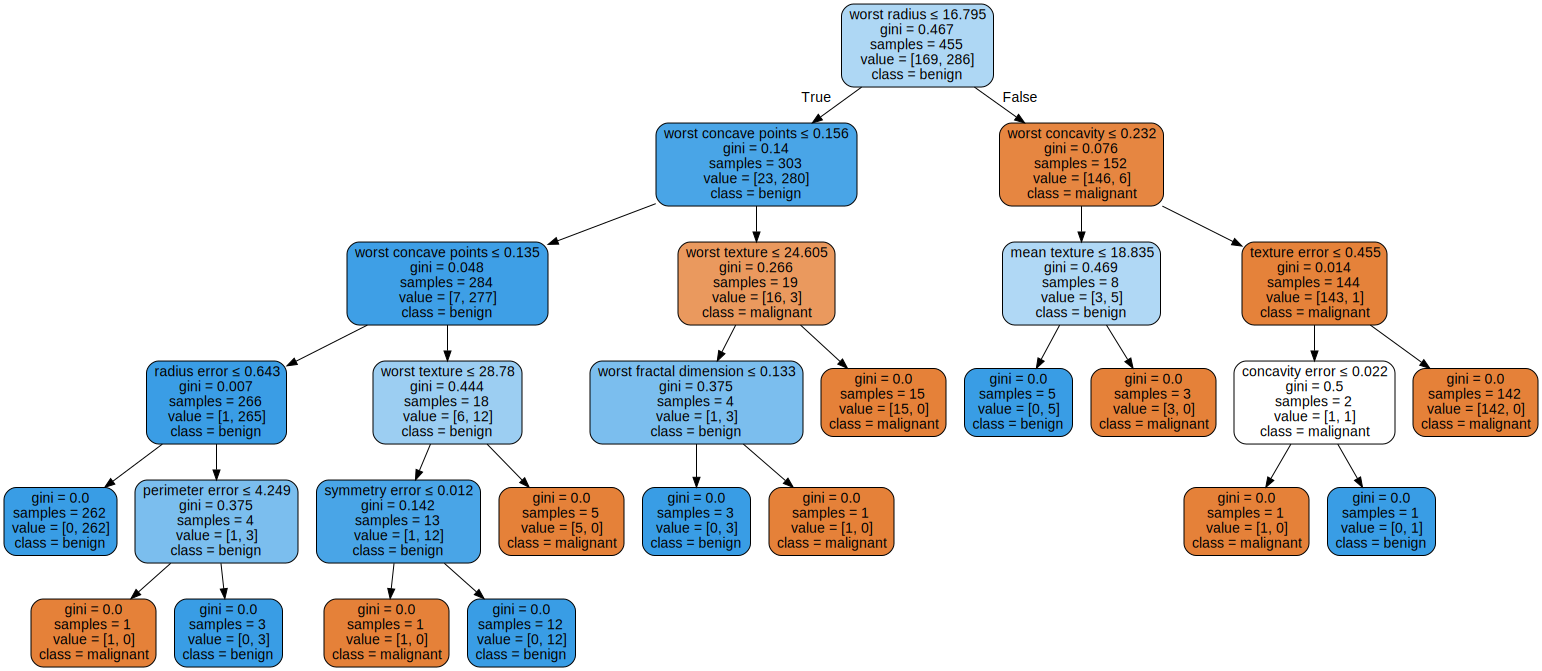

In [275]:
# 1.a Decision Tree Classifier - Breast Cancer

clf = tree.DecisionTreeClassifier()
clf = clf.fit(x1_train, y1_train)
y_pred_1 = clf.predict(x1_test)
print("Accuracy:",metrics.accuracy_score(y1_test, y_pred_1))
print("F1:",metrics.f1_score(y1_test, y_pred_1))

#show graph
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("breast_cancer_DecisionTreeClassifier") 

dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=breast_cancer.feature_names,  
                      class_names=breast_cancer.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

Accuracy: 0.6666666666666666
F1: 0.6666666666666666


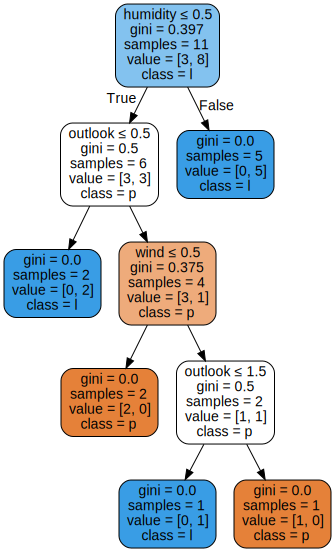

In [276]:
# 1.b Decision Tree Classifier - Play Tennis

d3_clf2 = tree.DecisionTreeClassifier()
d3_clf2 = d3_clf2.fit(x2_train, y2_train)
y_pred_2 = d3_clf2.predict(x2_test)
print("Accuracy:",metrics.accuracy_score(y2_test, y_pred_2))
print("F1:",metrics.f1_score(y2_test, y_pred_2))

dot_data = tree.export_graphviz(d3_clf2, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("play_tennis_DecisionTreeClassifier") 

dot_data = tree.export_graphviz(d3_clf2, out_file=None, 
                      feature_names=x2.columns.values.tolist(),
                      class_names="play",
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 


Accuracy: 0.9122807017543859
F1: 0.9305555555555556


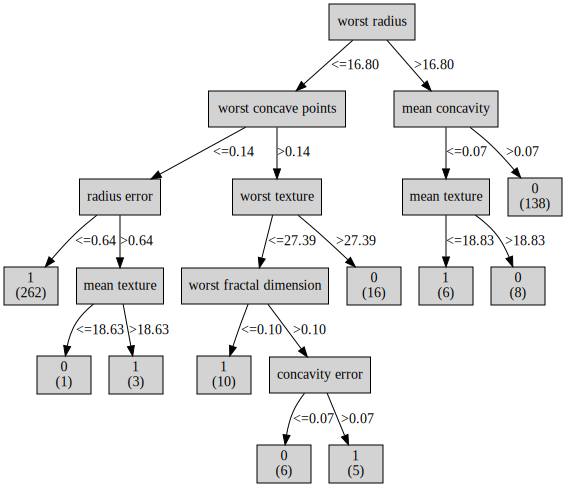

In [277]:
# 2.a decision tree breast cancer
import six 
from id3 import Id3Estimator
from id3 import export_graphviz
from id3 import export_text

clf = Id3Estimator()
clf.fit(x1_train, y1_train, check_input=True)
y_pred_1 = clf.predict(x1_test)
print("Accuracy:",metrics.accuracy_score(y1_test, y_pred_1))
print("F1:",metrics.f1_score(y1_test, y_pred_1))

dot_data = export_graphviz(clf.tree_, "out1.dot", x1.columns.values.tolist())
with open("out1.dot") as f:
    dot_graph = f.read()
graph = graphviz.Source(dot_graph)  
graph 

Accuracy: 0.6666666666666666
F1: 0.6666666666666666


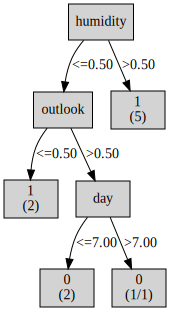

In [278]:
# 2.a decision tree play tennis

clf2 = Id3Estimator()
clf2.fit(x2_train, y2_train, check_input=True)
y_pred_2 = clf2.predict(x2_test)
print("Accuracy:",metrics.accuracy_score(y2_test, y_pred_2))
print("F1:",metrics.f1_score(y2_test, y_pred_2))

dot_data = export_graphviz(clf2.tree_, "out2.dot", x2.columns.values.tolist())
with open("out2.dot") as f:
    dot_graph = f.read()
graph = graphviz.Source(dot_graph)  
graph 


In [279]:
# 4.a Logistixc Regression Breast Cancer

clf = LogisticRegression(random_state=0, solver='lbfgs', max_iter=10000).fit(x1_train, y1_train)
y_pred_1 = clf.predict(x1_test)
print("Accuracy:",metrics.accuracy_score(y1_test, y_pred_1))
print("F1:",metrics.f1_score(y1_test, y_pred_1))

Accuracy: 0.9122807017543859
F1: 0.9315068493150686


In [280]:
# 4.b Logistixc Regression Play Tennis

clf = LogisticRegression(random_state=0, solver='lbfgs', max_iter=3000).fit(x2_train, y2_train)
y_pred_2 = clf.predict(x2_test)
print("Accuracy:",metrics.accuracy_score(y2_test, y_pred_2))
print("F1:",metrics.f1_score(y2_test, y_pred_2))

Accuracy: 0.3333333333333333
F1: 0.5
